In [1]:
# Let's suppose we have a DataFrame like this:
# Here exp and degree are independent feature and salary is dependent feature

import pandas as pd

data = {"exp": [2, 3, 4], "degree": ["BE", "PHD", "MASTERS"], "salary": [50, 70, 60]}
df = pd.DataFrame(data)
df

,exp,degree,salary
0,2,BE,50
1,3,PHD,70
2,4,MASTERS,60


### Some inputs which are required for gradient boosting:
* Inputs(independent and dependent features)
* Loss function(It can be different for classification problem and different for regresion, for regression can have MSE, RMSE, in classification problem we have: log loss, hinge loss, etc.; overall in both one condition should be loss function should be differentiable i.e. we can find derivative of it
* Number of trees

As this is regression problem, we will take MSE for now as loss function
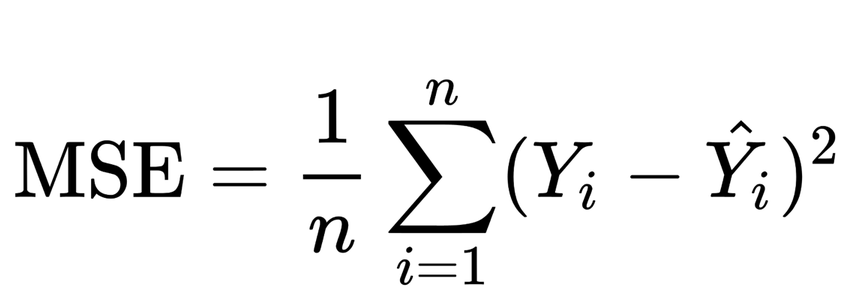




### Pseudo Algorithm of Gradient Boosting:
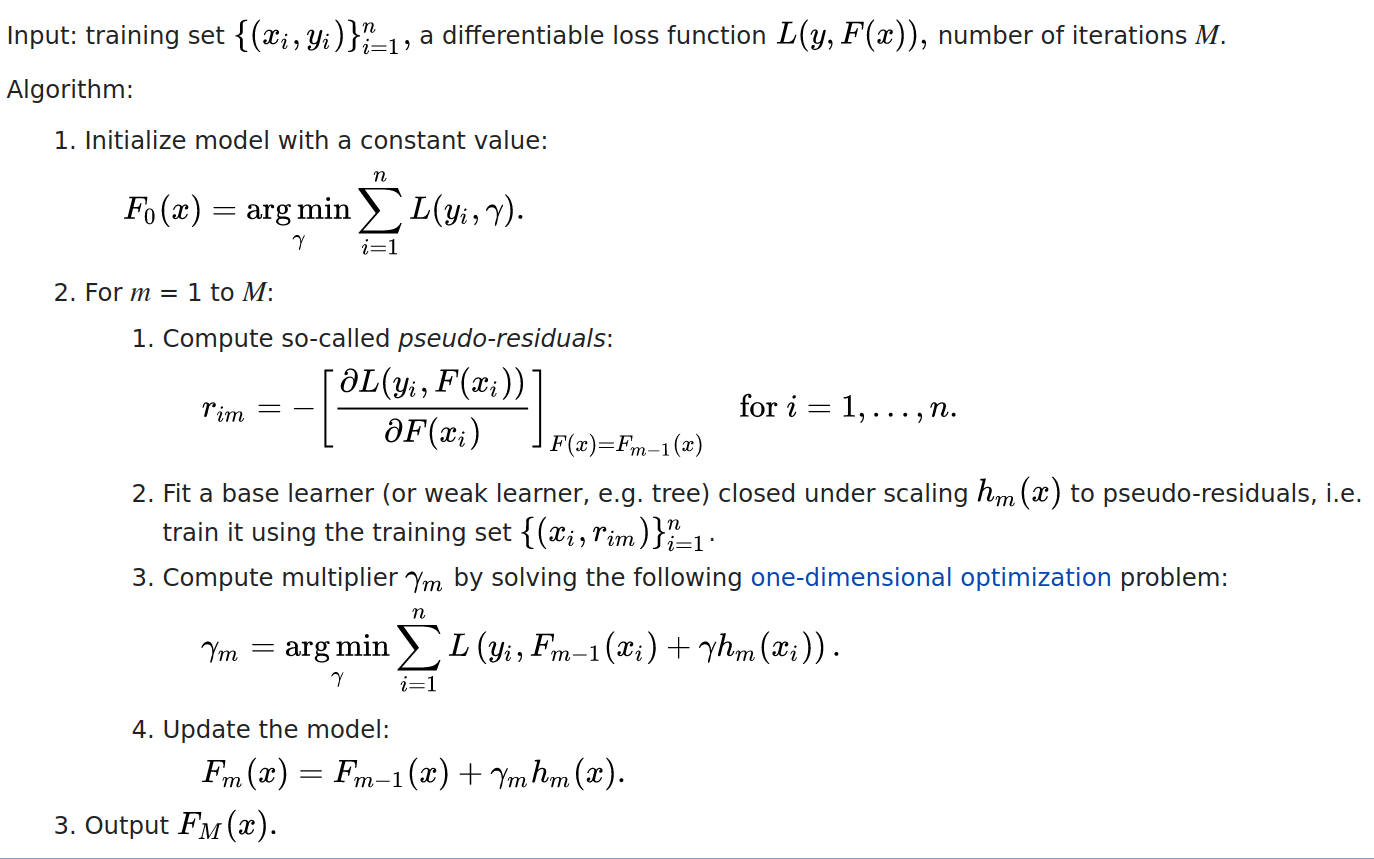


### Step 1:
Intialize model with constant value i.e. our base model, as we have described in README file to take average for this, but here we will use this formula:
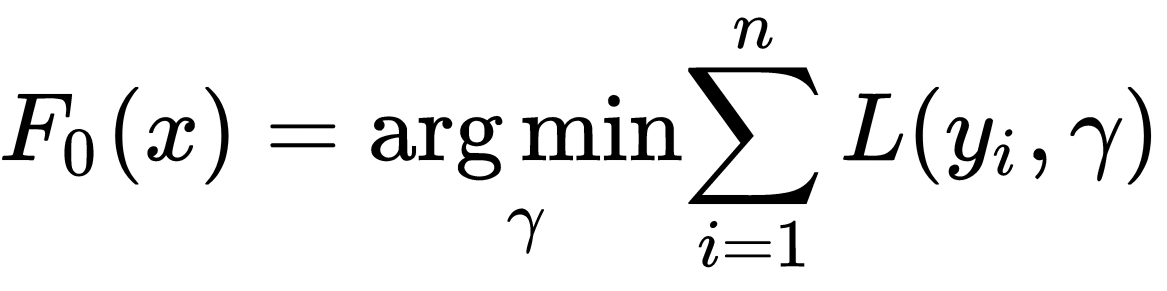



    γ is our predicted value,
    L is loss function,
    argmin is argument of the minimum; argminxf(x) describes: it is the value of x for which f(x) attains its minimum.
* Here we need to find γ(also represented as ŷ) in such a way the loss function value should be minimum, i.e. we should get minimum error, argmin is telling this only to consider minimum value. So in above dataframe, we can calculate it as:
    
        Loss = 1/2(50-ŷ)^2 + 1/2(70-ŷ)^2 + 1/2(60-ŷ)^2
        (Now if we want to find predicted value such that we minimize the loss, we need to find first order derivative Derivative of x^n = n.x^n-1)
        
        After taking derivative
       => 2/2(50-ŷ)*(-1) + 2/2(70-ŷ)*(-1) + 2/2(60-ŷ)*(-1)
       => -50 + ŷ - 70 + ŷ -60 + ŷ
       => 3ŷ - 180 => ŷ = 60
* This ŷ is output of the base model (we will add a new column ŷ having value 60 for each row.

### Step 2:
* Iterate from 1 to m; m =  number of trees
* Compute pseudo residual(i.e. pseudo error)
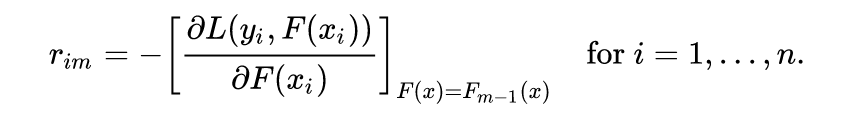

* This formula is nothing but just derivative of loss, here F(x) will be F0(x) which is calculated above(0 means for base model)

* If we try to find derivative of loss function(1/2(y-ŷ)^2)

        ∂L/∂ŷ =  2/2(y-ŷ)*(-1)
        ∂L/∂ŷ = -y+ŷ
        ∂L/∂ŷ = -(y-ŷ)
        -∂L/∂ŷ = (y-ŷ) ; LHS in this equation is only RHS in above diagram
        (`m` in `r`im is model, means which model we are running, here first time base model is there then m will be 1, similarly next for decision tree it will be 2; `i` is the entry, for which row in the dataset
        
* So in current dataset, for base model for first row: 
        
        r11= (y-ŷ) => 50-60 => r11 = -10;
        r21 = 70-60 => r21 = 10;
        r31 = 60-60 => r31 = 0
* Now to fit for training data, we create a decision tree where dependent feature will be this residual value: r11, r21, r31 and independent features will be same as before. Now we will train decision tree regressor 

### Step 3:
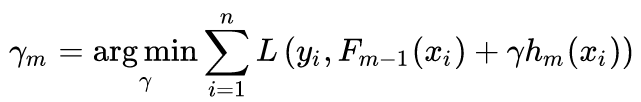
* Here equation is almost same as Step 1 equation, but here instead of γ, we have  Fm-1(xi)+ γ. This Fm-1(xi) is the previous model output.
* This function is equations says that we have to find γ that minimizes this particular loss. So here we can write loss as:
        
        Σ(i=1 to n) 1/2(yi-(60+ŷ))^2; where is 60 is previous model output
        (now we have to minimize this, so we have to do same step i.e. find out derivative and get ŷ value)
        
        Similarly for 2nd decision tree, both base learner and 1st model output will be added, this process goes on, till m number of trees.
        
### Step 4:
Updating the model
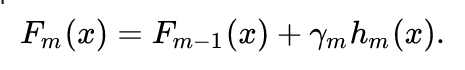

* Here we add each stage output until we get good score
F(m) is calculate by previous stage model's output

For first row: Fm-1(x) is -10 and γ is 60 , if we add both we get 50, if output would have had bigger value then we would have used second decision tree also.